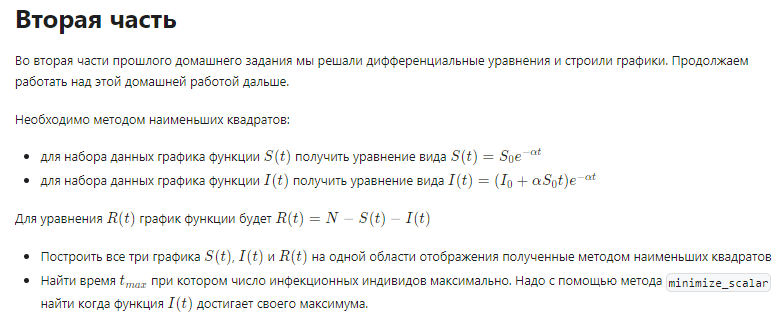


In [18]:
from scipy.integrate import solve_ivp
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.5
betta = 0.3
n = 1000000
s0 = 990000
i0=7000
r0=3000
t0, tf = 0, 25


def dsdt(t, s):
    return -alpha * s

soln_s_from_t = solve_ivp(dsdt, (t0, tf), [s0], dense_output=True)


y_solv = soln_s_from_t.y[0]
t_solv = soln_s_from_t.t

def s_from_t(t_solv, finding_s0, finding_alpha):    
    return finding_s0 * np.exp(-finding_alpha * t_solv)

def diff1(p, y_solv, t_solv):
    finding_s0, finding_alpha = p
    return y_solv - s_from_t(t_solv, finding_s0, finding_alpha)

p0 = (88000, 0.6)

aprx, _ = leastsq(diff1, p0, args=(y_solv, t_solv))

# 990000* np.exp(-0.5*0)
finding_s0 = aprx[0] 
finding_alpha = aprx[1]
aprx
print(finding_s0, finding_alpha)

989978.6396579541 0.49985600132477886


In [4]:
#990000* np.exp(-0.5*0)

array([7.0e+03, 9.9e+05, 5.0e-01])

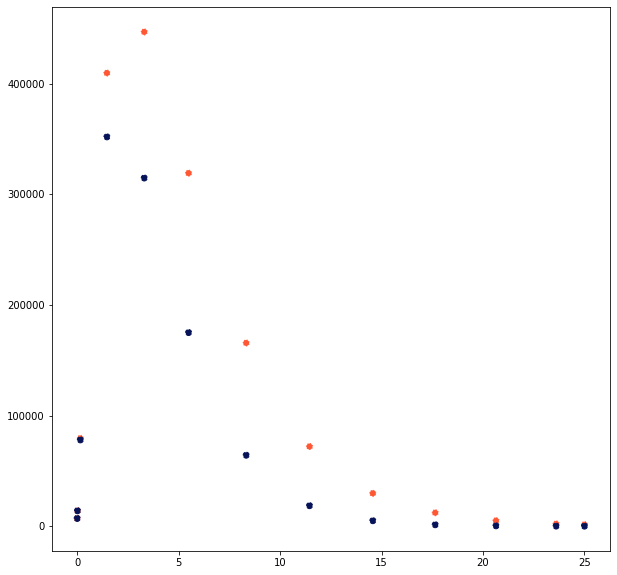

In [53]:
def didt(t, i):
    return alpha * soln_s_from_t.sol(t) - betta*i

soln_i_from_t = solve_ivp(didt, (t0, tf), [i0], dense_output=True)

y_solv1 = soln_i_from_t.y[0]
#print(soln_i_from_t)

t_solv1 = soln_i_from_t.t

def i_from_t(t_solv1, finding_i0, finding_alpha_new, finding_s0_new):    
    return (finding_i0 + finding_alpha * finding_s0_new * t_solv1) * np.exp(- finding_alpha_new * t_solv1)

def diff2(p, y_solv1, t_solv1):
    finding_i0, finding_alpha_new, finding_s0_new = p
    abc = y_solv1 - i_from_t(t_solv1, finding_i0, finding_alpha_new, finding_s0_new)
    return abc

p0 = (6800, 990000, 0.5)

aprx1, _  = leastsq(diff2, p0, args=(y_solv1, t_solv1))

def r_from_t(t_solv1):    
    return n - soln_s_from_t.sol(t_solv1) - soln_i_from_t.sol(t_solv1)


plt.scatter(soln_i_from_t.t, soln_i_from_t.y[0], linestyle=":", label="ggg", color="#FF5733")
plt.scatter(soln_i_from_t.t, i_from_t(t_solv1=soln_i_from_t.t, finding_i0=aprx1[0], finding_alpha_new=aprx1[2], finding_s0_new=aprx1[1]),  linestyle="--", label="ccc", color="#061358")
#plt.rcParams["figure.figsize"] = [10, 10 ]
#plt.legend()
#plt.show()


#z = i_from_t(0, aprx1[0], aprx1[1], aprx1[2])
#print(z)
aprx1

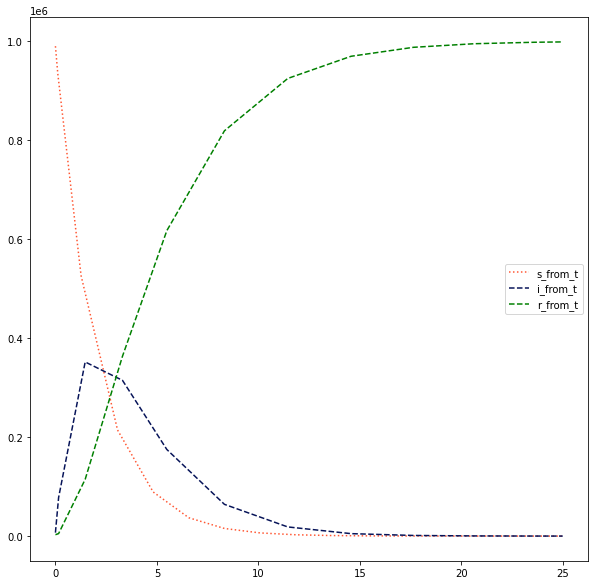

In [74]:
y= r_from_t(soln_i_from_t.t)

plt.plot(soln_s_from_t.t, s_from_t(soln_s_from_t.t, finding_s0, finding_alpha), linestyle=":", label="s_from_t", color="#FF5733")
plt.plot(soln_i_from_t.t, i_from_t(soln_i_from_t.t, aprx1[0], aprx1[2], aprx1[1]),  linestyle="--", label="i_from_t", color="#061358")
plt.plot(soln_i_from_t.t, y[0],  linestyle="--", label="r_from_t", color="green")
plt.legend()

In [85]:
from scipy.optimize import minimize_scalar
x = soln_i_from_t.t
aprx1_0 = aprx1[0]
aprx1_1 = aprx1[1]
aprx1_2 = aprx1[2]
result = minimize_scalar(lambda x, aprx1_0, aprx1_2, aprx1_1: -i_from_t(x, aprx1_0, aprx1_2, aprx1_1), bracket=(0, 1, 3.5), args=(aprx1_0, aprx1_2, aprx1_1))
result.x

1.9858545430485848